In [1]:
import pandas as pd
from pprint import pprint
import re
import wordcloud
import  matplotlib.pyplot as plt

In [2]:
def read_feature_matrix(method,category):
    df = pd.read_excel('./feature_matrix/{}_feature_{}.xlsx'.format(method,category),index_col=0)
    print(df.shape)
    return df

In [3]:
def word_list(s):
    return s.split('|')

def get_department_top_feature(df,department,col_name,feature_matrix,feature_matrix_col):
    df_department = df.loc[df['病区'] == department]
    word_sets = set()

    word_val = {}
    def handle(s):
        for w in word_list(s):
            word_sets.add(w)
    df_department[col_name].apply(handle)
    print('单词数目:' + str(len(word_sets)))
    for w in word_sets:
        word_val[w] = feature_matrix.loc[w,feature_matrix_col]
    
    # 取top10
    word_val = sorted(word_val.items(),key=lambda x:x[1],reverse=True)
    return word_val

In [4]:
path = './data/data_with_segment.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 30)

In [5]:
chi_feature_diagnose = read_feature_matrix('chi','diagnose')
ig_feature_diagnose = read_feature_matrix('ig','diagnose')
mi_feature_diagnose = read_feature_matrix('mi','diagnose')

(1690, 14)
(1690, 1)
(1690, 14)


In [34]:
chi_feature_diagnose

,肝胆外科病区,妇产科病区,普通外科病区,心血管病区,眼科病区,整形外科病区,泌尿外科中心病区,骨科病区,耳鼻咽喉科病区,口腔科病区,神经内科病区,神经外科病区,普通胸外科病区,CHI_MAX
眼,1.9449,3.4255,2.7008,3.1363,2462.0024,0.1642,3.6733,5.7091,1.7770,0.7176,0.4583,6.9296,1.5937,2462.0024
胆囊,2175.7908,28.2673,13.8098,18.6034,0.9742,0.9742,15.2726,48.0178,8.4342,4.2566,1.0081,14.5373,9.4532,2175.7908
心,13.6209,38.3854,25.3807,2130.6636,1.6842,1.6842,28.5396,80.2585,18.2233,7.3589,0.0206,20.6576,16.3429,2130.6636
宫,28.6541,2009.4694,30.6204,46.2064,2.4197,2.4197,49.1974,119.2644,26.1810,10.5724,4.6769,36.1071,23.4794,2009.4694
肺,15.1305,31.6251,7.8920,1.5952,1.2777,1.2777,14.2603,55.0541,13.8246,3.6195,3.5655,6.3438,1982.5742,1982.5742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
摘除术,0.1379,1.6290,0.1915,0.2224,0.0116,0.0116,0.2605,0.8868,0.1260,0.0509,0.0325,0.1738,0.1130,1.6290
放化疗,0.2760,0.2096,1.3288,0.4451,0.0233,0.0233,0.7141,1.1488,0.2522,0.1018,0.0650,1.5756,0.2262,1.5756
疣,0.2069,0.6169,0.2874,0.3337,0.0175,0.0175,1.4020,0.2113,0.1891,0.0764,0.0488,0.2608,0.1696,1.4020
肾病,0.2760,0.2096,1.3288,0.4451,0.0233,0.0233,0.7141,0.0169,0.2522,0.1018,0.0650,0.3478,0.2262,1.3288


In [46]:
chi_feature_diagnose.loc['脑梗死','神经内科病区']

1350.7246

In [20]:
word_val_diagnose = get_department_top_feature(df,'骨科病区','术前诊断_分词',ig_feature_diagnose,'IG') #只能是IG法
pprint(word_val_diagnose)

单词数目:439


KeyError: 'mi_MAX'

In [47]:
# 生成文本字符串，用于词云表示(用于IG法)
def gen_string(lis):
    ans = ''
    for word,weight in lis:
        if word in ['子宫','胆囊']:
            w = 0.05
        else:
            w = weight
        ans = ans + ' ' + ((word+' ') * int(w*1000)).strip()
    return ans

# 生成文本字符串，用于词云表示
def gen_string1(feature_matrix,department):
    ans = ''
    words = list(feature_matrix[department].index)
    weight = list(feature_matrix[department])
    for word,weight in zip(words,weight):
        if word in ['子宫','胆囊']:
            w = 0.05
        else:
            w = weight
        if weight > 1000:
            w = w - 500
        ans = (ans + ' ' + ((word+' ') * int(weight)).strip()).strip()
    return ans

In [48]:
string = gen_string1(chi_feature_diagnose,'神经内科病区')
string

'胆囊 宫 宫 宫 宫 肺 肺 肺 胆囊结石 胆囊结石 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 脑梗 

In [49]:

wc = wordcloud.WordCloud(font_path='C:/Windows/Fonts/Deng.ttf',width=1000,height=800,background_color='white',collocations=False).generate(string)

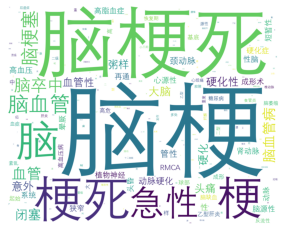

In [50]:
plt.imshow(wc)
plt.axis('off')
plt.show()

In [23]:
int(13.5)

13